<a href="https://colab.research.google.com/github/Lucas-Abrahao/Alura-Python-para-DS/blob/main/Pandas_Formatos_Diferentes_de_Entradas_e_Saidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criando os Nomes

In [1]:
import pandas as pd

In [3]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

In [7]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
16,JULIA,0,430067,17,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [12]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
1,JOAO,0,2971935,2,M
19,RODRIGO,0,598825,20,M
11,GABRIEL,0,922744,12,M
2,ANTONIO,0,2567494,3,M
4,CARLOS,0,1483121,5,M


In [9]:
print('Quantidade de Nomes:', (len(nomes_m) + len(nomes_f)))

Quantidade de Nomes: 40


In [13]:
frames = [nomes_f, nomes_m]

In [14]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
2,FRANCISCA
10,LUIS
12,RAFAEL
13,BRUNA
13,DANIEL


#Criando o ID dos Alunos

In [16]:
import numpy as np
np.random.seed(123)

In [18]:
total_alunos = len(nomes)
total_alunos

40

In [19]:
nomes['ID_Aluno'] = np.random.permutation(total_alunos) + 1

In [21]:
nomes.head()

,nome,ID_Aluno
0,MARIA,7
1,ANA,11
2,FRANCISCA,13
3,ANTONIA,39
4,ADRIANA,6


In [23]:
dominios = ['@dominio.com.br', '@servico.com']
nomes['Dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,ID_Aluno,Dominio
0,MARIA,7,@servico.com
5,JULIANA,12,@servico.com
10,SANDRA,9,@servico.com
14,MARCELO,23,@servico.com
13,BRUNA,8,@dominio.com.br


In [27]:
nomes['email'] = nomes.nome.str.cat(nomes.Dominio).str.lower()
nomes.sample(5)

,nome,ID_Aluno,Dominio,email
14,MARCELO,23,@servico.com,marcelo@servico.com
2,FRANCISCA,13,@dominio.com.br,francisca@dominio.com.br
12,RAFAEL,33,@dominio.com.br,rafael@dominio.com.br
9,ALINE,21,@dominio.com.br,aline@dominio.com.br
11,CAMILA,38,@dominio.com.br,camila@dominio.com.br


#Criando a Tabela Cursos

In [28]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import html5lib

In [70]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [71]:
type(cursos)

list

In [72]:
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

In [73]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


#Alterando o Index dos Cursos

In [74]:
cursos = cursos.rename(columns = {'Nome do curso' : 'Nome_do_Curso'})
cursos.head()

,Nome_do_Curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [75]:
cursos['id_curso'] = cursos.index +1

In [76]:
cursos.head()

,Nome_do_Curso,id_curso
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [77]:
cursos = cursos.set_index('id_curso')
cursos.head()

,Nome_do_Curso
id_curso,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


#Matriculando os Alunos nos Cursos

In [48]:
nomes['Matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [49]:
nomes.sample(5)

,nome,ID_Aluno,Dominio,email,Matriculas
11,GABRIEL,37,@dominio.com.br,gabriel@dominio.com.br,2
19,RODRIGO,3,@servico.com,rodrigo@servico.com,2
18,RAIMUNDO,29,@dominio.com.br,raimundo@dominio.com.br,1
9,ALINE,21,@dominio.com.br,aline@dominio.com.br,2
6,PEDRO,15,@dominio.com.br,pedro@dominio.com.br,4


In [50]:
nomes['Matriculas'].describe()

count    40.00000
mean      2.15000
std       1.83345
min       1.00000
25%       1.00000
50%       2.00000
75%       2.00000
max      10.00000
Name: Matriculas, dtype: float64

In [51]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


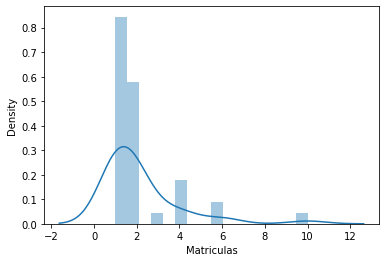

In [52]:
sns.distplot(nomes['Matriculas'])

In [53]:
nomes['Matriculas'].value_counts()

1     19
2     13
4      4
6      2
10     1
3      1
Name: Matriculas, dtype: int64

In [54]:
nomes.sample(5)

,nome,ID_Aluno,Dominio,email,Matriculas
11,GABRIEL,37,@dominio.com.br,gabriel@dominio.com.br,2
7,LUCAS,1,@dominio.com.br,lucas@dominio.com.br,1
14,MARCELO,23,@servico.com,marcelo@servico.com,4
17,FELIPE,35,@servico.com,felipe@servico.com,1
3,ANTONIA,39,@servico.com,antonia@servico.com,10


#Selecionando Cursos

In [85]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [86]:
for index, row in nomes.iterrows():
  id = row.ID_Aluno
  matriculas = row.Matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['ID_Aluno','id_curso'])

In [87]:
matriculas.head()

,ID_Aluno,id_curso
0,7,4
1,7,9
2,11,7
3,13,8
4,39,17


In [111]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nome_do_Curso']).rename(columns={'ID_Aluno':'quantidade_de_alunos'})

In [112]:
nomes.sample(5)

,nome,ID_Aluno,Dominio,email,Matriculas
0,MARIA,7,@servico.com,maria@servico.com,2
4,CARLOS,30,@dominio.com.br,carlos@dominio.com.br,2
1,JOAO,5,@servico.com,joao@servico.com,1
12,AMANDA,25,@servico.com,amanda@servico.com,1
13,DANIEL,34,@dominio.com.br,daniel@dominio.com.br,2


In [113]:
cursos.head()

,Nome_do_Curso
id_curso,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [114]:
matriculas.head()

,ID_Aluno,id_curso
0,7,4
1,7,9
2,11,7
3,13,8
4,39,17


In [115]:
matriculas_por_curso

,quantidade_de_alunos,Nome_do_Curso
id_curso,,
1,2,Lógica de programação
2,3,Java para Web
3,5,C# para Web
4,6,Ruby on Rails
5,1,Cursos de Python
6,2,PHP com MySql
7,5,.NET para web
8,7,Novas integrações com Java
9,6,TDD com Java


#Saida em Diferentes Formatos

In [95]:
matriculas_por_curso.to_csv('Matriculas_por_Curso.csv', index = False)

In [96]:
matriculas_json = matriculas_por_curso.to_json()

In [97]:
matriculas_json

'{"ID_Aluno":{"1":2,"2":3,"3":5,"4":6,"5":1,"6":2,"7":5,"8":7,"9":6,"11":5,"12":10,"13":5,"14":3,"15":2,"16":3,"17":4,"18":6,"19":3,"20":8},"Nome_do_Curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [98]:
matriculas_html = matriculas_por_curso.to_html()

In [100]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ID_Aluno</th>
      <th>Nome_do_Curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>5</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>6</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>2</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>5</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>7</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>6</td>
      <td>TDD com Jav

#Criando o Banco SQL

In [101]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


In [103]:
type(engine)

sqlalchemy.engine.base.Engine

#Buscando no Banco SQL

In [120]:
query = 'select * from matriculas where quantidade_de_alunos < 20 '

In [121]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,Nome_do_Curso
0,1,2,Lógica de programação
1,2,3,Java para Web
2,3,5,C# para Web
3,4,6,Ruby on Rails
4,5,1,Cursos de Python
5,6,2,PHP com MySql
6,7,5,.NET para web
7,8,7,Novas integrações com Java
8,9,6,TDD com Java
9,11,5,Preparatório para certificação Java


In [123]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['Nome_do_Curso', 'quantidade_de_alunos'])

In [127]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 5')

In [128]:
muitas_matriculas

,Nome_do_Curso,quantidade_de_alunos
3,Ruby on Rails,6
7,Novas integrações com Java,7
8,TDD com Java,6
10,Hardware básico,10
16,Programação funcional,6
18,Orientação objetos com Java,8


#Escrevendo no Banco

In [129]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [131]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Nomes dos Alunos da Proxima Turma

In [134]:
matriculas_por_curso

,quantidade_de_alunos,Nome_do_Curso
id_curso,,
1,2,Lógica de programação
2,3,Java para Web
3,5,C# para Web
4,6,Ruby on Rails
5,1,Cursos de Python
6,2,PHP com MySql
7,5,.NET para web
8,7,Novas integrações com Java
9,6,TDD com Java


In [136]:
id_curso = 8
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,ID_Aluno,id_curso
3,13,8
12,39,8
22,21,8
27,25,8
50,30,8
55,15,8
60,16,8


In [137]:
nomes.sample(5)

,nome,ID_Aluno,Dominio,email,Matriculas
7,LUCAS,1,@dominio.com.br,lucas@dominio.com.br,1
7,FERNANDA,2,@dominio.com.br,fernanda@dominio.com.br,3
8,PATRICIA,14,@servico.com,patricia@servico.com,1
0,MARIA,7,@servico.com,maria@servico.com,2
2,ANTONIO,27,@servico.com,antonio@servico.com,4


In [138]:
proxima_turma.set_index('ID_Aluno').join(nomes.set_index('ID_Aluno'))

,id_curso,nome,Dominio,email,Matriculas
ID_Aluno,,,,,
13,8,FRANCISCA,@dominio.com.br,francisca@dominio.com.br,1
39,8,ANTONIA,@servico.com,antonia@servico.com,10
21,8,ALINE,@dominio.com.br,aline@dominio.com.br,2
25,8,AMANDA,@servico.com,amanda@servico.com,1
30,8,CARLOS,@dominio.com.br,carlos@dominio.com.br,2
15,8,PEDRO,@dominio.com.br,pedro@dominio.com.br,4
16,8,MARCOS,@servico.com,marcos@servico.com,1


In [139]:
proxima_turma.set_index('ID_Aluno').join(nomes.set_index('ID_Aluno'))['nome']

ID_Aluno
13    FRANCISCA
39      ANTONIA
21        ALINE
25       AMANDA
30       CARLOS
15        PEDRO
16       MARCOS
Name: nome, dtype: object

In [141]:
proxima_turma.set_index('ID_Aluno').join(nomes.set_index('ID_Aluno'))['nome'].to_frame()

,nome
ID_Aluno,
13,FRANCISCA
39,ANTONIA
21,ALINE
25,AMANDA
30,CARLOS
15,PEDRO
16,MARCOS


In [142]:
nome_curso = cursos.loc[id_curso]
nome_curso

Nome_do_Curso    Novas integrações com Java
Name: 8, dtype: object

In [145]:
nome_curso = nome_curso.Nome_do_Curso 
nome_curso 

'Novas integrações com Java'

In [146]:
proxima_turma = proxima_turma.set_index('ID_Aluno').join(nomes.set_index('ID_Aluno'))['nome'].to_frame()
proxima_turma

,nome
ID_Aluno,
13,FRANCISCA
39,ANTONIA
21,ALINE
25,AMANDA
30,CARLOS
15,PEDRO
16,MARCOS


In [148]:
proxima_turma = proxima_turma.rename(columns = {'nome' :'Alunos do Curso de {}'.format(nome_curso)})
proxima_turma

,Alunos do Curso de Novas integrações com Java
ID_Aluno,
13,FRANCISCA
39,ANTONIA
21,ALINE
25,AMANDA
30,CARLOS
15,PEDRO
16,MARCOS


#Excel

In [149]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)